# Introduction

In this notebook we will explore the data and try to find some insights. We will also try to find some patterns in the data which will help us in feature engineering and model building for later stages.

# Setup

In [1]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup matplotlib
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [3]:
# Path to files
test_csv_path = "./data/test.csv"
train_csv_path = "./data/train.csv"
target_labels_csv = "./data/train_labels.csv"

sample_submission_csv = "./data/sample_submission.csv"

# Data Loading

In [4]:
level_group_cat_type = pd.CategoricalDtype(
    categories=["0-4", "5-12", "13-22"], ordered=True
)

In [5]:
train_df = pd.read_csv(
    train_csv_path,
    index_col="index",
    dtype={
        "session_id": "int64",
        "elapsed_time": "int32",
        "event_name": "category",
        "name": "category",
        "level": "int8",
        "page": "Int8",
        "room_coor_x": "float32",
        "room_coor_y": "float32",
        "screen_coor_x": "float32",
        "screen_coor_y": "float32",
        "hover_duration": "float32",
        "text": "str",
        "fqid": "category",
        "room_fqid": "category",
        "text_fqid": "category",
        "fullscreen": "int8",
        "hq": "int8",
        "music": "int8",
        "level_group": level_group_cat_type,
    },
)

In [6]:
target_df = pd.read_csv(target_labels_csv)

In [7]:
target_df[["session_id", "question_number"]] = target_df["session_id"].str.split(
    "_", expand=True
)

In [8]:
# Get the question number as int
target_df["question_number"] = (
    target_df["question_number"].str.extract("(\d+)").astype("int8")
)

Its not necessary, but we are going to convert the correct column to a boolean type.

In [9]:
target_df["correct"] = target_df["correct"].astype("bool")

# EDA

In [10]:
# Check number of nan values in each column
train_df.isna().sum()

session_id               0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
fullscreen               0
hq                       0
music                    0
level_group              0
dtype: int64

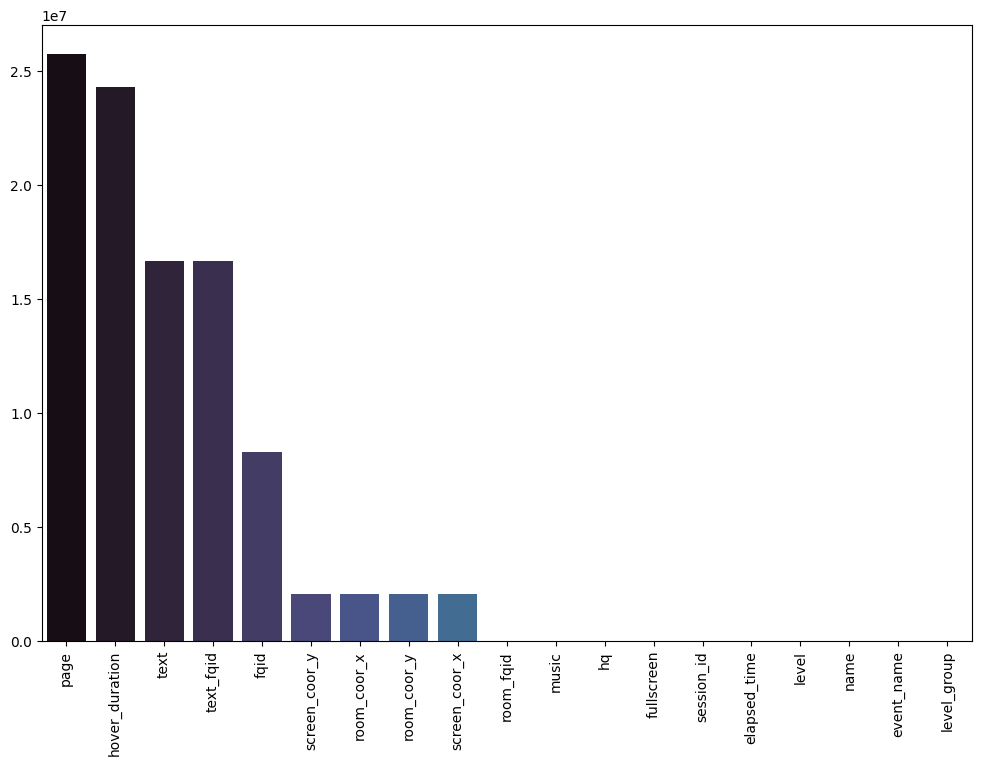

In [11]:
# Plot frequency of nan values in each column
plt.figure(figsize=(12, 8))

sns.barplot(
    x=train_df.isna().sum().index,
    y=train_df.isna().sum().values,
    order=train_df.isna().sum().sort_values(ascending=False).index,
    palette="mako",
)

plt.xticks(rotation=90)

plt.show()

As we can see, some columns like `page`, `hover_duration`, `text` and `text_fquid` have a lot of missing values. We'll see later how to deal with this and if this is a problem or not.

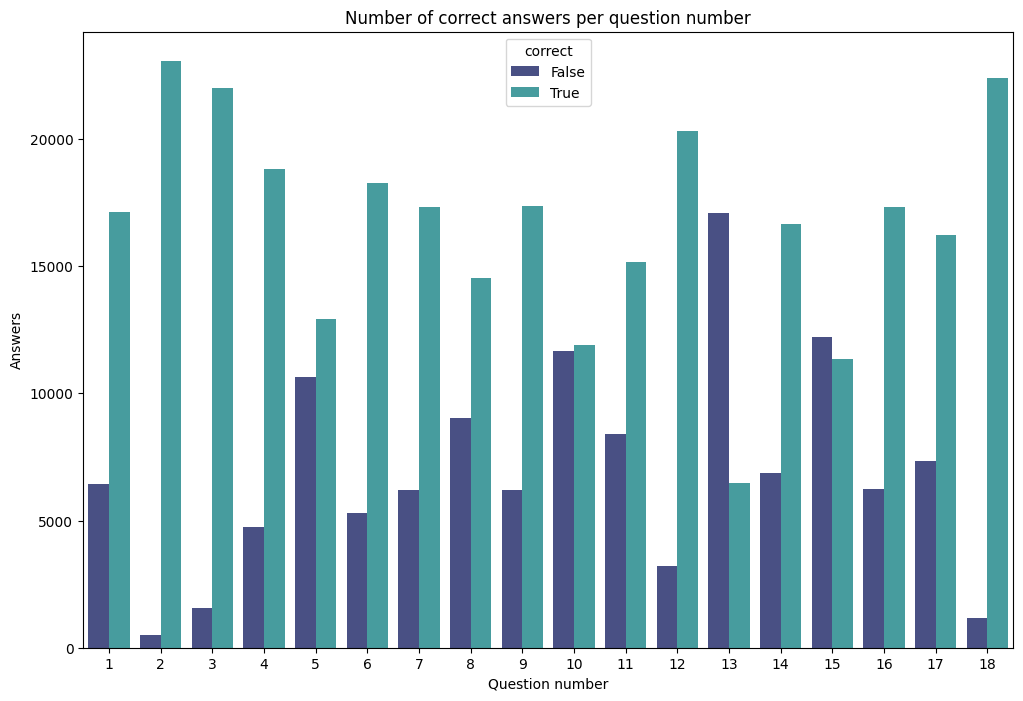

In [12]:
# Plot number of correct answers per question
plt.figure(figsize=(12, 8))

sns.countplot(x="question_number", hue="correct", data=target_df, palette="mako")

plt.xlabel("Question number")
plt.ylabel("Answers")

plt.title("Number of correct answers per question number")

plt.show()

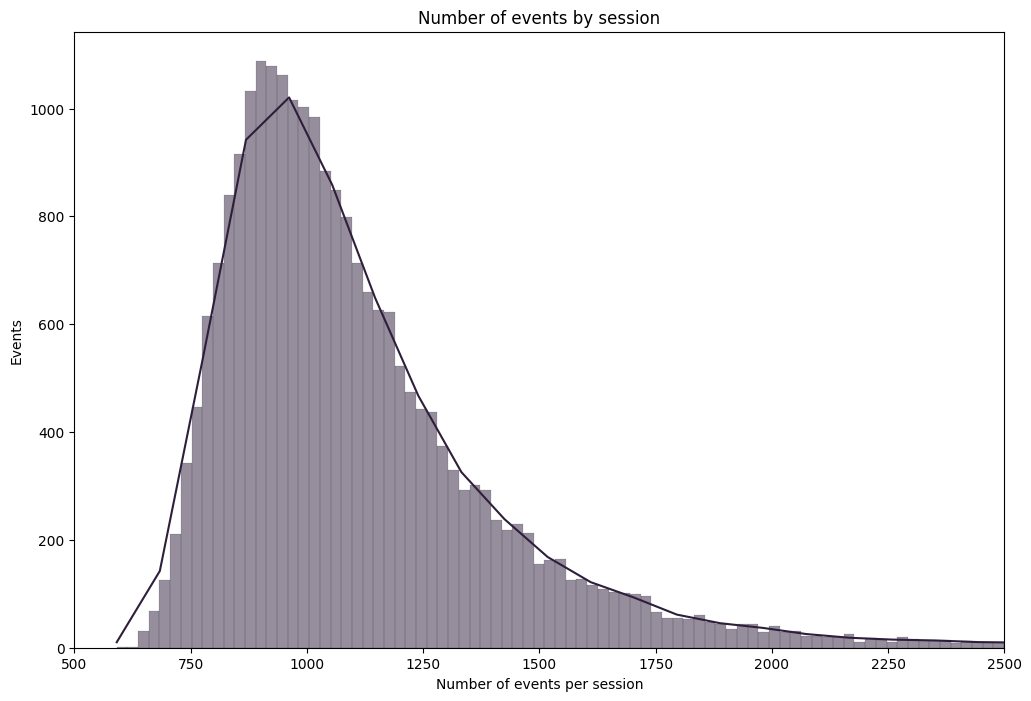

In [13]:
# Plot number of events by session
plt.figure(figsize=(12, 8))

sns.histplot(
    x=train_df["session_id"].value_counts(),
    data=train_df,
    kde=True,
    color=sns.color_palette("mako")[0],
)

plt.xlabel("Number of events per session")
plt.ylabel("Events")
plt.xlim(500, 2500)

plt.title("Number of events by session")
plt.show()

In [14]:
# Average number of events per session
train_df["session_id"].value_counts().mean()

1116.0744418979714

In [15]:
train_df["elapsed_time"].describe()

count    2.629695e+07
mean     4.016694e+06
std      3.127032e+07
min      0.000000e+00
25%      4.397000e+05
50%      1.014801e+06
75%      1.747040e+06
max      1.988607e+09
Name: elapsed_time, dtype: float64

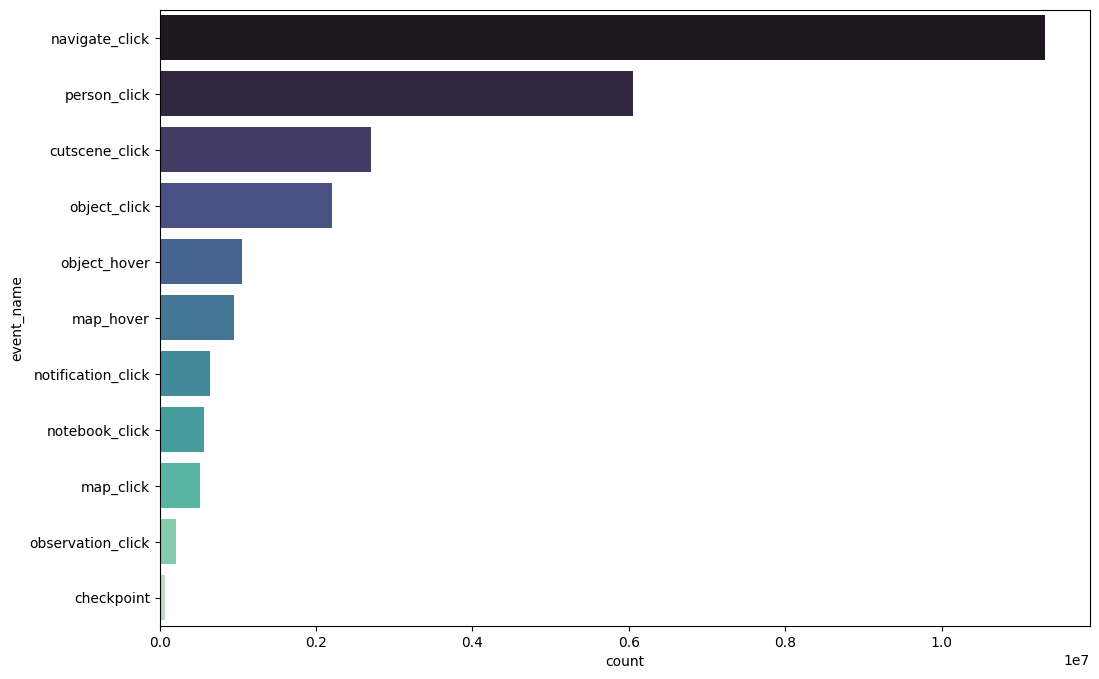

In [16]:
# Plot frequency of events
plt.figure(figsize=(12, 8))

sns.countplot(
    y="event_name",
    data=train_df,
    order=train_df["event_name"].value_counts().index,
    palette="mako",
)

plt.show()

In [17]:
# Number of events per level_group
counts = train_df["level_group"].value_counts().sort_index()
counts

level_group
0-4       3981005
5-12      8844238
13-22    13471703
Name: count, dtype: int64

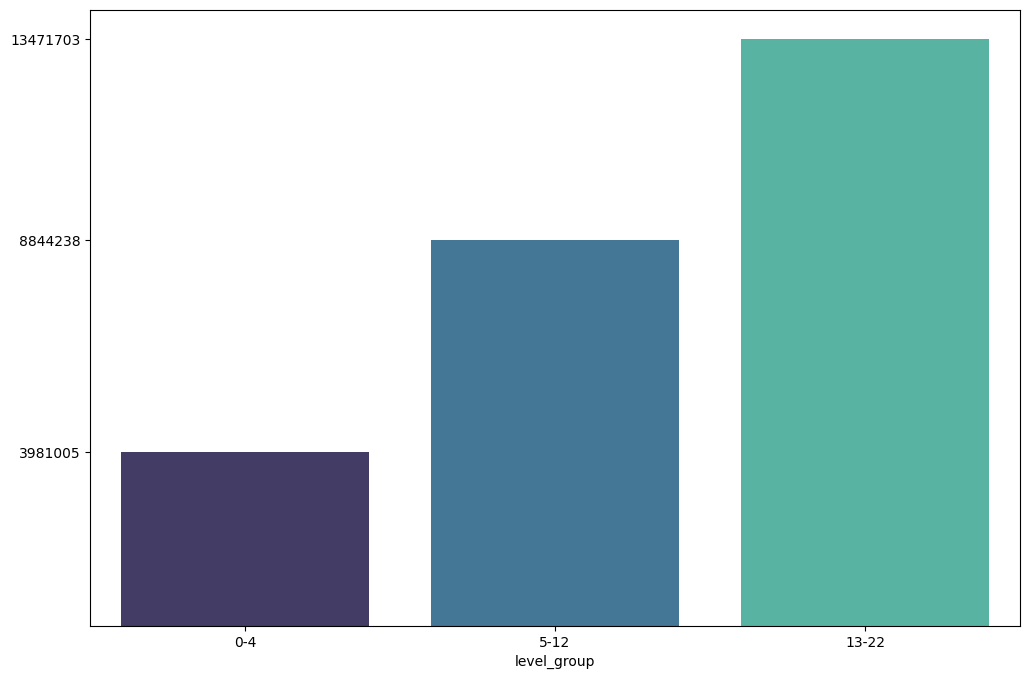

In [18]:
# Plot number of events per level_group
plt.figure(figsize=(12, 8))

sns.barplot(x=counts.index, y=counts.values, palette="mako")

plt.yticks(counts.values, counts.values)

plt.show()

<Axes: xlabel='level_group'>

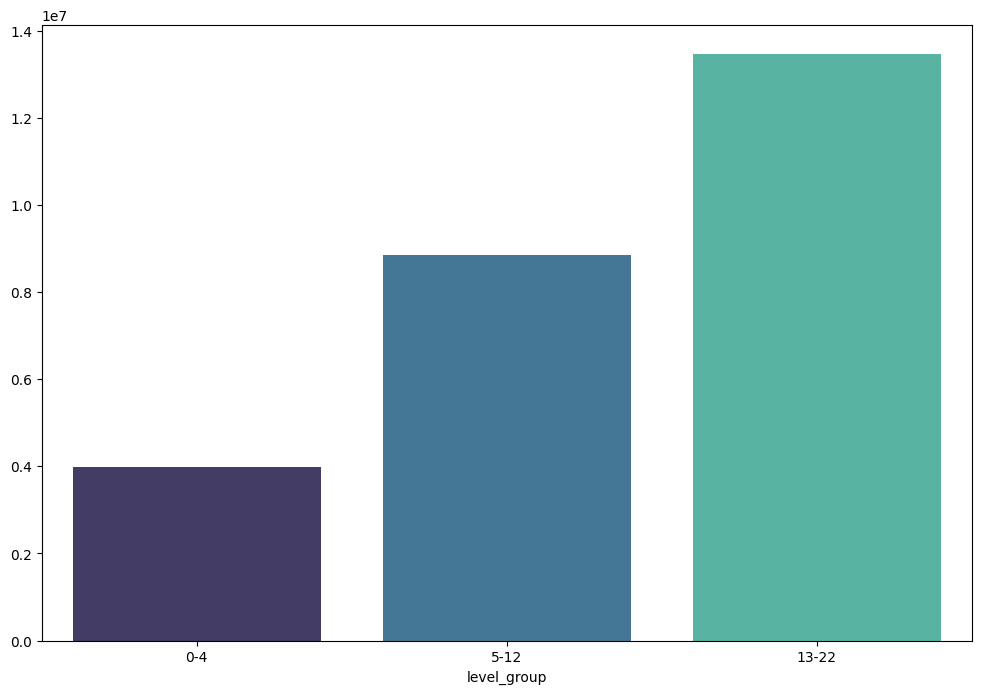

In [19]:
# Plot number of events per level
plt.figure(figsize=(12, 8))

sns.barplot(
    x=counts.index,
    y=counts.values,
    palette="mako",
)